 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
X_st = X.copy().astype(np.float64)

y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [5]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [6]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [7]:
lambdas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
w0 = []
w1 = []
w2 = []
w3 = []

for lam in lambdas:
    w = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_ = lam)
    w0.append(w[0])
    w1.append(w[1])
    w2.append(w[2])
    w3.append(w[3])

500 [57.39479705  5.10767868  2.46037345  4.08674902] 39.981664122534156
1000 [57.39713005  5.765859    1.85689028  4.03893236] 39.80723120406397
1500 [57.39713014  5.99060723  1.60529698  4.06885866] 39.78240504280034
2000 [57.39713014  6.07152025  1.50155606  4.09300748] 39.7785235657889
2500 [57.39713014  6.10185559  1.45905205  4.10572941] 39.777887486171274
3000 [57.39713014  6.11355928  1.44170275  4.11160375] 39.777779304702605
3500 [57.39713014  6.11816175  1.43463681  4.11416107] 39.77775983405892
4000 [57.39713014  6.11999396  1.43176283  4.1152412 ] 39.777755943216036
4500 [57.39713014  6.12072893  1.43059479  4.11568989] 39.77775502451418
5000 [57.39713014  6.12102515  1.4301203   4.11587451] 39.77775476050766
500 [57.38332572  5.10662251  2.46132815  4.08599345] 39.98229200003175
1000 [57.38565349  5.76317218  1.85955446  4.03807747] 39.807832335731575
1500 [57.38565359  5.98689514  1.6091706   4.06780457] 39.78283105813376
2000 [57.38565359  6.06727215  1.50613375  4.0917

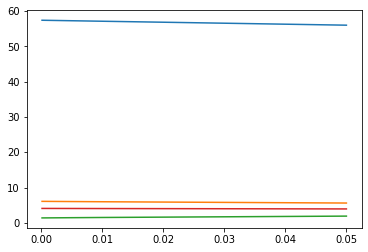

In [8]:
plt.plot(lambdas, w0)
plt.plot(lambdas, w1)
plt.plot(lambdas, w2)
plt.plot(lambdas, w3)

 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но они будут схожи